In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from IPython.display import display, HTML
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import plotly
import plotly.graph_objs as go
from sklearn.ensemble import RandomForestClassifier

In [2]:
import os
os.chdir("..")
!pwd

/home/rcgonzal/DSC180Malware/m2v-adversarial-hindroid


In [3]:
data_folder = "data/out/all-apps/"

TODO:
- Nodes per Category
- 10 most common apis
- 10 most common packages
- Malware vs Popular apps

In [24]:
num_apps = pd.read_csv('data/out/all-apps/app_map.csv').shape[0]
num_apis = pd.read_csv('data/out/all-apps/api_map.csv').shape[0]
num_methods = pd.read_csv('data/out/all-apps/method_map.csv').shape[0]
num_packages = pd.read_csv('data/out/all-apps/package_map.csv').shape[0]

In [25]:
counts = pd.DataFrame(data={'Count': [num_apps, num_apis, num_methods, num_packages]},
    index=pd.Series(['$Apps$', '$APIs$', '$Method$', '$Packages$'], name='Node Type'))
counts.head().style.format("{:,.0f}")

,Count
Node Type,
$Apps$,"6,072"
$APIs$,"5,160,691"
$Method$,"5,517,770"
$Packages$,"551,624"


| Node Type   |            Count |
|:------------|-----------------:|
| Apps        |   6072           |
| APIs        |      5.16069e+06 |
| Packages    | 551624           |

In [27]:
api_data = pd.read_csv('data/out/all-apps/api_map.csv')
api_data['pkg'] = api_data.api.str.replace('[$;].*', '')
api_data

<ipython-input-27-cfe182876253>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  api_data['pkg'] = api_data.api.str.replace('[$;].*', '')


,api,uid,pkg
0,Lcom/bumptech/glide/Priority;->values()[Lcom/b...,api0,Lcom/bumptech/glide/Priority
1,Lcom/bumptech/glide/Priority;->ordinal()I,api1,Lcom/bumptech/glide/Priority
2,Landroid/widget/ImageView$ScaleType;->values()...,api2,Landroid/widget/ImageView
3,Landroid/widget/ImageView$ScaleType;->ordinal()I,api3,Landroid/widget/ImageView
4,Lcom/bumptech/glide/request/target/ViewTarget;...,api4,Lcom/bumptech/glide/request/target/ViewTarget
...,...,...,...
5160686,Lb/a/a/a/a/d/b;->b(Ljava/lang/String;)V,api5160686,Lb/a/a/a/a/d/b
5160687,Lb/a/a/a/a/d/c;->a(I)Ljava/util/List;,api5160687,Lb/a/a/a/a/d/c
5160688,Lb/a/a/a/a/d/c;->d()V,api5160688,Lb/a/a/a/a/d/c
5160689,Lb/a/a/a/a/d/b;->a(Ljava/lang/String;)J,api5160689,Lb/a/a/a/a/d/b


In [37]:
# top 10 most popular packages among all apps
api_data.pkg.value_counts().sort_values().iloc[-10:]

Landroidx/fragment/app/Fragment                             1724
Lcom/google/android/gms/games/internal/IGamesService        1922
Landroidx/recyclerview/widget/LinearLayoutManager           1948
Lcom/explorestack/protobuf/DescriptorProtos                 2072
Landroidx/recyclerview/widget/StaggeredGridLayoutManager    2178
Lautovalue/shaded/com/google                                3711
Lcom/google/protobuf/DescriptorProtos                       3893
Lcom/google/android/gms/games/internal/GamesClientImpl      4204
Landroid/support/v7/widget/RecyclerView                     5201
Landroidx/recyclerview/widget/RecyclerView                  9358
Name: pkg, dtype: int64

In [30]:
def compute_model_performance_statistics(pred, true):
    '''
    Returns a series with the f1-score, accuracy, recall, and confusion counts (TP, TN, FP, FN).
    '''
    TN, FP, FN, TP = confusion_matrix(true, pred).ravel()
    return pd.Series({
        'f1': f1_score(true, pred),
        'acc': accuracy_score(true, pred),
        'rec': recall_score(true, pred),
        'TP': TP,
        'TN': TN,
        'FP': FP,
        'FN': FN
    })
    
    
def performance_table(m2v_results_path, hindroid_results_path):
    results = pd.read_csv(m2v_results_path, index_col='app').join(pd.read_csv(hindroid_results_path, index_col='app'))
    y_true = results.true
    
    for name, col in results.iteritems():
        

In [29]:
m2v_results_path = 'data/out/miniset-test/m2vDroid-results.csv'
hindroid_results_path = 'data/out/miniset-test/miniset-train_HD_predictions.csv'

results = pd.read_csv(m2v_results_path, index_col='app').join(pd.read_csv(hindroid_results_path, index_col='app'))
results

,m2vDroid,AAT,ABAT,APAT,ABPBTAT,APBPTAT,true
app,,,,,,,
08037fd7a9c467428d0532de77a23dac,1,1,0,1,1,0,1
081269b6f1141106eff8b65607907b87,1,1,1,1,1,1,1
10e671ce435b9085bd3120600d20c270,1,1,1,1,1,1,1
1298c022a8a2fb60b7db5b2c3a1c6ee5,1,1,1,1,1,1,1
15b2f232d9d33652c378f6a6127f575e,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
fi.blob.murkwoods3dvr,0,0,0,1,0,1,0
happy.new.year2019.live.wallpaper,0,0,0,0,0,0,0
me.pou.app,0,0,0,1,0,0,0


In [21]:
all_apps = pd.read_csv('data/out/all-apps/features.csv', index_col='app').drop(columns=['uid'])
ground_truth = pd.read_csv('data/out/all-apps/app_list.csv', index_col='app').malware
training_set = pd.read_csv('data/out/miniset-train/app_list.csv', index_col='app').index
training_set = all_apps.loc[training_set]
test_set = pd.read_csv('data/out/miniset-test/app_list.csv', index_col='app').index
test_set = all_apps.loc[test_set]

y_train = ground_truth[training_set.index]
y_test = ground_truth[test_set.index]

In [28]:
mdl = RandomForestClassifier(max_depth=3, n_jobs=-1)
mdl.fit(training_set, y_train)

results = pd.DataFrame(index=test_set.index)
results['m2vDroid'] = mdl.predict(test_set)
results.to_csv('data/out/miniset-test/m2vDroid-results.csv')

In [11]:
!pip install tabulate

Defaulting to user installation because normal site-packages is not writeable
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [11]:
vectors = pd.read_csv(os.path.join(data_folder, 'features.csv'))
vectors = vectors.set_index('app')

all_apps = pd.read_csv("data/out/all-apps/all_apps.csv", index_col='app')
all_apps['label'] = all_apps[all_apps.category=='malware'].app_dir.str.split('/').apply(lambda list: list[5])
top_9_malware = all_apps.label.value_counts().sort_values(ascending=False)[:9]
top_9_min = top_9_malware.min()
other_mal_map = {key: "Other malware" for key, value in all_apps.label.value_counts().items() if value <= top_9_min}
#         other_mal_map = {key: key for key, value in all_apps.label.value_counts().items() if value <= 200}
all_apps.label = all_apps.label.map(other_mal_map).fillna(all_apps.label)
all_apps.label.fillna(all_apps.category, inplace=True)

In [12]:
vectors = vectors.assign(
    label=all_apps.label,
    category=all_apps.category
)
labels = vectors.label

# Retrieve node embeddings and corresponding subjects
node_ids = list(vectors.uid)  # list of node IDs
node_embeddings = vectors.drop(columns=['uid', 'category', 'label'])
node_targets = labels

transform = TSNE  # PCA

# 2D plot -- matplotlib
trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(node_embeddings)
label_map = {l: i for i, l in enumerate(np.unique(node_targets))}
node_colours = [label_map[target] for target in node_targets]

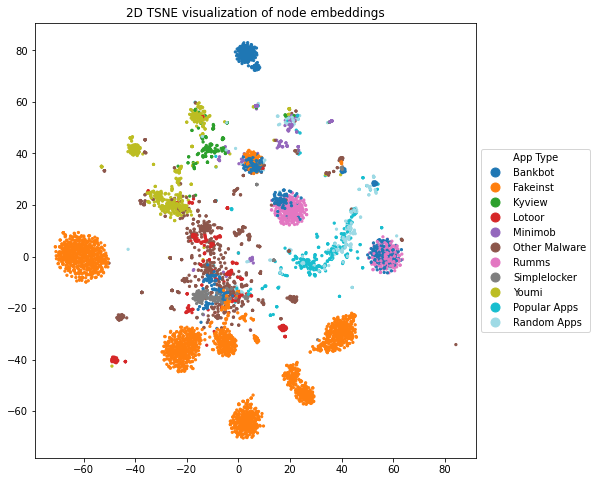

In [16]:
# 2D plot -- matplotlib
plt.figure(figsize=(10, 8))
plt.axes().set(aspect="equal")
scatter = plt.scatter(
    node_embeddings_2d[:, 0],
    node_embeddings_2d[:, 1],
    c=node_colours,
    cmap='tab20',
    alpha=1,
    s=5
)
plt.title("2D {} visualization of node embeddings".format(transform.__name__))
legend1 = plt.legend(scatter.legend_elements()[0], pd.Series(label_map.keys()).str.replace('-', ' ').str.title(),
                    loc='center left', bbox_to_anchor=(1, 0.5), title="App Type", markerscale=1.5)
# order labels (https://stackoverflow.com/a/46160465/13710014)
handles, labels = plt.gca().get_legend_handles_labels()

In [26]:
scatter.get_legend_handles_labels()

AttributeError: 'PathCollection' object has no attribute 'get_legend_handles_labels'

In [21]:
legend1.get_label()

''

In [14]:
handles, labels

([], [])

In [17]:
# 3D plot - using plotly
trans3d = transform(n_components=3)
node_embeddings_3d = trans3d.fit_transform(node_embeddings)
data_3d = pd.DataFrame(node_embeddings_3d, index=vectors.index)
data_3d['malware'] = vectors['category']=='malware'
data_3d['type'] = vectors.label
type_chart = data_3d[['malware', 'type']].drop_duplicates()
type_chart['num'] = type_chart.type.map(label_map)

In [22]:
layout = go.Layout(
    title="Interactive 3D TNSE representation of node embeddings",
    margin={'l': 0, 'r': 0, 'b': 0, 't': 30},
    legend=dict(y=0.5, itemsizing='constant'),
    scene={
        'xaxis': {
            'showspikes': False,
            'showgrid': False, 
            'zeroline': False, 
            'visible': False
        },
        'yaxis': {
            'showspikes': False,
            'showgrid': False, 
            'zeroline': False, 
            'visible': False
        },
        'zaxis': {
            'showspikes': False,
            'showgrid': False, 
            'zeroline': False, 
            'visible': False
        }
    }
)

fig = go.Figure(layout=layout)

# add invisible bounding trace to keep axes' scale constant
fig.add_trace(
    go.Scatter3d(
        x=[data_3d[0].min(), data_3d[0].max()],
        y=[data_3d[1].min(), data_3d[1].max()],
        z=[data_3d[2].min(), data_3d[2].max()],
        mode='markers',
        marker={
            'color':'rgba(0,0,0,0)',
            'opacity': 0,
        },
        showlegend=False
    )
)

for index, row in type_chart.sort_values('num', ascending=False).iterrows():
    if row['malware']:
        symbol = 'circle'
        group='Malware'
        size = 2
    else:
        symbol = 'x'
        group='Non-Malware'
        size = 1.5
    
    name = f"{legendgroup}, {row['type']}"

    if row['type']=='Other malware':
        name=row['type']

    df = data_3d[data_3d.type==row['type']]
    rbg = tuple([255*val for val in cm.tab20(row['num'])[:3]])
    color = f"rgb{rbg}"
    trace  = go.Scatter3d(
        name=name,
        x=df[0],
        y=df[1],
        z=df[2],
        customdata=list(df.index),
        hovertemplate=
        "<b>%{customdata}</b><br>" +
        f"{name}" +
        "<extra></extra>",
        mode='markers',
        marker={
            'size': size,
            'opacity': 1,
            'color': color,
            'symbol': symbol,
        },
    )
    
    fig.add_trace(trace)

# Save the plot.
fig.show()

In [14]:
# 3D plot - using plotly
trans3d = PCA(n_components=3)
node_embeddings_3d = trans3d.fit_transform(node_embeddings)
data_3d = pd.DataFrame(node_embeddings_3d, index=vectors.index)
data_3d['malware'] = vectors['category']=='malware'
data_3d['type'] = vectors.label
type_chart = data_3d[['malware', 'type']].drop_duplicates()
type_chart['num'] = type_chart.type.map(label_map)

layout = go.Layout(
    title="Interactive 3D PCA representation of node embeddings",
    margin={'l': 0, 'r': 0, 'b': 0, 't': 30},
    legend=dict(y=0.5, itemsizing='constant'),
    scene={
        'xaxis': {
#             'range': [data_3d[0].min(), data_3d[0].max()],
            'showspikes': False,
            'showgrid': False, 
            'zeroline': False, 
            'visible': False
        },
        'yaxis': {
#             'range': [data_3d[1].min(), data_3d[1].max()],
            'showspikes': False,
            'showgrid': False, 
            'zeroline': False, 
            'visible': False
        },
        'zaxis': {
#             'range': [data_3d[2].min(), data_3d[2].max()],
            'showspikes': False,
            'showgrid': False, 
            'zeroline': False, 
            'visible': False
        }
    }
)

fig = go.Figure(layout=layout)

# add invisible bounding trace to keep axes' scale constant
fig.add_trace(
    go.Scatter3d(
        x=[data_3d[0].min(), data_3d[0].max()],
        y=[data_3d[1].min(), data_3d[1].max()],
        z=[data_3d[2].min(), data_3d[2].max()],
        mode='markers',
        marker={
            'color':'rgba(0,0,0,0)',
            'opacity': 0,
        },
        showlegend=False
    )
)

for index, row in type_chart.sort_values('num', ascending=False).iterrows():
    if row['malware']:
        symbol = 'circle'
        name = f"Malware, {row['type']}"
        size = 2
    else:
        symbol = 'x'
        name = f"Non-malware, {row['type']}"
        size = 1.5

    if row['type']=='Other malware':
        name=row['type']

    df = data_3d[data_3d.type==row['type']]
    rbg = tuple([255*val for val in cm.tab10(row['num'])[:3]])
    color = f"rgb{rbg}"
    trace  = go.Scatter3d(
        name=name,
        x=df[0],
        y=df[1],
        z=df[2],
        customdata=list(df.index),
        hovertemplate=
        "<b>%{customdata}</b><br>" +
        f"{name}" +
        "<extra></extra>",
        mode='markers',
        marker={
            'size': size,
            'opacity': 1,
            'color': color,
            'symbol': symbol,
        }
    )
    
    fig.add_trace(trace)

# Save the plot.
fig.show()

In [ ]:
help(go.layout.XAxis.range)